# Real Estate Price Prediction
https://www.kaggle.com/c/realestatepriceprediction

In [1]:
!kaggle competitions download -c realestatepriceprediction

realestatepriceprediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
from zipfile import ZipFile

with ZipFile("realestatepriceprediction.zip") as zipFile:
   zipFile.extractall()

In [3]:
import pandas as pd

df = pd.read_csv("train.csv")
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


### Описание полей с сайта kaggle:

- Id - идентификационный номер квартиры
- DistrictId - идентификационный номер района
- Rooms - количество комнат
- Square - площадь
- LifeSquare - жилая площадь
- KitchenSquare - площадь кухни
- Floor - этаж
- HouseFloor - количество этажей в доме
- HouseYear - год постройки дома
- Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
- Social_1, Social_2, Social_3 - социальные показатели местности
- Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
- Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
- Price - цена квартиры

Очевидно, что поле `DistrictId` является категориальным.

Полное описание полей `Ecology_1`, `Ecology_2`, `Ecology_3`, `Social_1`, `Social_2`, `Social_3`, `Healthcare_1`, `Helthcare_2`, `Shops_1`, `Shops_2`, к сожалению, отсутствует. Однако по данным, которые в них находятся, можно предположить, что часть из них также категориальные. Отметим их с помощью метода `pd.Categorical`.

In [4]:
df["DistrictId"] = pd.Categorical(df["DistrictId"])
df["Ecology_2"] = pd.Categorical(df["Ecology_2"])
df["Ecology_3"] = pd.Categorical(df["Ecology_3"])
df["Social_1"] = pd.Categorical(df["Social_1"])
df["Social_3"] = pd.Categorical(df["Social_3"])
df["Helthcare_2"] = pd.Categorical(df["Helthcare_2"])
df["Shops_1"] = pd.Categorical(df["Shops_1"])
df["Shops_2"] = pd.Categorical(df["Shops_2"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null category
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null category
Ecology_3        10000 non-null category
Social_1         10000 non-null category
Social_2         10000 non-null int64
Social_3         10000 non-null category
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null category
Shops_1          10000 non-null category
Shops_2          10000 non-null category
Price            10000 non-null float64
dtypes: category(8), float64(8), int64(4)
memory usage: 1.0 MB


Поля `Rooms` и `HouseFloor` имеют тип `float64`, хотя по смыслу больше подходит `int32`.
Следует проверить, есть ли в данных дробные значения количества комнат и этажей в здании.

In [5]:
df[df["Rooms"] % 1 > 0].shape[0]

0

In [6]:
df[df["HouseFloor"] % 1 > 0].shape[0]

0

Такие данные отсутствуют. Изменим типы данных у этих полей.

In [7]:
df["Rooms"] = df["Rooms"].astype("int32")
df["HouseFloor"] = df["HouseFloor"].astype("int32")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null category
Rooms            10000 non-null int32
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null int32
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null category
Ecology_3        10000 non-null category
Social_1         10000 non-null category
Social_2         10000 non-null int64
Social_3         10000 non-null category
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null category
Shops_1          10000 non-null category
Shops_2          10000 non-null category
Price            10000 non-null float64
dtypes: category(8), float64(6), int32(2), int64(4)
memory usage: 964.8 KB


Поля `LifeSquare` и `Healthcare_1` содержат значения `NaN`. Посмотрим также на статистику по значениям полей.

In [8]:
df.describe(include='all')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.0,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000,10000,10000.0,10000.000000,10000.0,5202.000000,10000.0,10000.0,10000,10000.000000
unique,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,51.0,NaN,30.0,NaN,7.0,16.0,2,NaN
top,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,2.0,NaN,0.0,NaN,0.0,0.0,B,NaN
freq,NaN,851.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9903,9725,688.0,NaN,2997.0,NaN,4214.0,2316.0,9175,NaN
mean,8383.40770,NaN,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,NaN,NaN,NaN,5352.157400,NaN,1142.904460,NaN,NaN,NaN,214138.857399
std,4859.01902,NaN,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,NaN,NaN,NaN,4006.799803,NaN,1021.517264,NaN,NaN,NaN,92872.293865
min,0.00000,NaN,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,NaN,NaN,NaN,168.000000,NaN,0.000000,NaN,NaN,NaN,59174.778028
25%,4169.50000,NaN,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,NaN,NaN,NaN,1564.000000,NaN,350.000000,NaN,NaN,NaN,153872.633942
50%,8394.50000,NaN,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,NaN,NaN,NaN,5285.000000,NaN,900.000000,NaN,NaN,NaN,192269.644879
75%,12592.50000,NaN,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,NaN,NaN,NaN,7227.000000,NaN,1548.000000,NaN,NaN,NaN,249135.462171


Если внимательно посмотреть на `min` и `max`, то можно заметить следующие проблемы:

- Сильно завышенный год постройки здания;
- Записи с нулевым количеством комнат;
- Записи, в которых значение жилой площади или площади кухни больше, чем общая площадь;
- Дома с нулевым количеством этажей;
- Этаж помещения больше, чем количество этажей в здании;

Попробуем устранить перечисленные недостатки.

### Завышенный год постройки здания

In [9]:
df[df["HouseYear"] > 2021]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1,37.265070,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2,44.791836,28.360393,5.0,4,9,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


Значение `20052011` судя по всему является датой: 20 Мая 2011 года; в году `4968` похоже допустили опечатку в первой цифре.
Установим корректные значения.

In [10]:
df.loc[1497, "HouseYear"] = 2011
df.loc[4189, "HouseYear"] = 1968

### Нулевое количество этажей

In [11]:
df[df["HouseFloor"] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2,80.312926,NaN,0.0,14,0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
23,6641,54,3,118.907612,NaN,0.0,2,0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3,106.958871,0.641822,0.0,17,0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
39,9371,23,2,60.503248,NaN,0.0,16,0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
44,10521,38,3,104.211396,106.340403,0.0,20,0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,12302,30,1,46.072913,48.307844,0.0,4,0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,161403.094034
9769,9384,59,3,98.607328,NaN,0.0,14,0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,492700.257473
9878,11441,62,2,71.985335,72.453232,0.0,5,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,158841.624543
9908,3171,62,1,35.873961,NaN,0.0,25,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,134379.130962


Записей с нулевым количеством этажей довольно много: 269. Попробуем также обобщить проблему и вывести записи, у которых указано, что `HouseFloor` < `Floor`

In [12]:
df[df["HouseFloor"] < df["Floor"]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2,80.312926,NaN,0.0,14,0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
14,10953,27,1,53.769097,52.408027,1.0,5,4,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
16,2119,27,2,49.360648,31.993964,5.0,6,5,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
21,11935,27,2,64.711835,NaN,1.0,15,1,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3,118.907612,NaN,0.0,2,0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3,64.074977,47.633428,6.0,11,9,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
9985,16159,27,1,38.968338,NaN,1.0,10,1,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
9989,4145,96,3,90.055233,47.860231,11.0,26,24,2005,0.041116,B,B,53,14892,4,NaN,1,4,B,441108.911237
9991,11553,3,3,101.622794,51.628780,12.0,18,17,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504


Здесь ситуация ещё хуже: имеем 1825 таких записей. Выставим для всех таких случаев значение `0`

In [13]:
import numpy as np

invalid_house_floor = df[df["HouseFloor"] < df["Floor"]]

df.loc[invalid_house_floor.index, "HouseFloor"] = 0

df.loc[invalid_house_floor.index]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2,80.312926,NaN,0.0,14,0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
14,10953,27,1,53.769097,52.408027,1.0,5,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
16,2119,27,2,49.360648,31.993964,5.0,6,0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
21,11935,27,2,64.711835,NaN,1.0,15,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3,118.907612,NaN,0.0,2,0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3,64.074977,47.633428,6.0,11,0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
9985,16159,27,1,38.968338,NaN,1.0,10,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
9989,4145,96,3,90.055233,47.860231,11.0,26,0,2005,0.041116,B,B,53,14892,4,NaN,1,4,B,441108.911237
9991,11553,3,3,101.622794,51.628780,12.0,18,0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504


### Некорректные значения жилой площади и площади кухни

Заполним некорректные поля значением `NaN`, аналогично полю `HouseFloor`

In [14]:
invalid_life_square = df[df["Square"] < df["LifeSquare"]]

df.loc[invalid_life_square.index, "LifeSquare"] = np.NaN

df.loc[invalid_life_square.index]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1,42.530043,NaN,1.0,3,9,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3,104.211396,NaN,0.0,20,0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2,61.400054,NaN,0.0,17,22,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3,85.952306,NaN,1.0,4,0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1,51.831473,NaN,1.0,5,0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2,59.015896,NaN,12.0,5,5,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
9889,12918,23,2,51.440463,NaN,51.0,3,17,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
9895,2737,27,3,123.430072,NaN,123.0,5,10,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
9902,14001,73,1,44.098768,NaN,1.0,7,24,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161


In [15]:
invalid_kitchen_square = df[df["Square"] < df["KitchenSquare"]]

df.loc[invalid_kitchen_square.index, "KitchenSquare"] = 0

df.loc[invalid_kitchen_square.index]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1,47.100719,46.447960,0.0,4,0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,13703,42,1,38.071692,19.723548,0.0,9,10,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,6569,27,1,38.220258,18.716856,0.0,4,17,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
8584,14679,81,1,32.276663,19.278394,0.0,6,0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


### Нулевое количество комнат

In [16]:
df[df["Rooms"] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0,138.427694,136.215499,0.0,4,0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0,212.932361,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0,41.790881,NaN,0.0,13,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0,49.483501,NaN,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0,81.491446,NaN,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0,38.697117,19.345131,9.0,9,16,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0,87.762616,85.125471,0.0,5,15,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


По значению площади можно предположить, что помещения с Id = 7317, 770, 3224, 3159 могут иметь одну комнату. Однако для остальных записей всё гораздо менее однозначно. Построим матрицу корреляций для некатегориальных признаков:

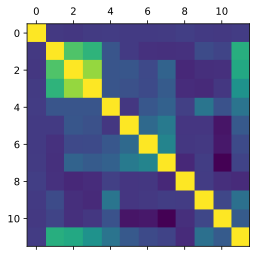

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_2,Healthcare_1,Price
Id,1.000000,-0.006891,-0.010654,0.004738,0.009067,0.001386,-0.002287,0.003471,0.018235,-0.002162,-0.004054,0.009654
Rooms,-0.006891,1.000000,0.669164,0.579935,0.114070,-0.001280,-0.033526,-0.038284,-0.031915,0.070521,0.042655,0.551256
Square,-0.010654,0.669164,1.000000,0.808893,0.113023,0.116530,0.062249,0.178955,-0.065597,-0.042503,-0.039621,0.521005
LifeSquare,0.004738,0.579935,0.808893,1.000000,0.113711,0.095062,0.066699,0.139078,-0.052647,-0.060591,-0.012345,0.410482
KitchenSquare,0.009067,0.114070,0.113023,0.113711,1.000000,-0.010190,0.120801,0.166645,0.022008,0.261619,0.098319,0.256240
Floor,0.001386,-0.001280,0.116530,0.095062,-0.010190,1.000000,0.204943,0.284693,-0.016124,-0.017006,-0.138444,0.128938
HouseFloor,-0.002287,-0.033526,0.062249,0.066699,0.120801,0.204943,1.000000,0.336841,-0.008983,-0.004868,-0.125654,0.063448
HouseYear,0.003471,-0.038284,0.178955,0.139078,0.166645,0.284693,0.336841,1.000000,-0.066484,0.013688,-0.205642,0.036331
Ecology_1,0.018235,-0.031915,-0.065597,-0.052647,0.022008,-0.016124,-0.008983,-0.066484,1.000000,0.009439,-0.043463,-0.058438
Social_2,-0.002162,0.070521,-0.042503,-0.060591,0.261619,-0.017006,-0.004868,0.013688,0.009439,1.000000,0.050288,0.239281


In [17]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

valid_rooms = df[df["Rooms"] >= 1]

corr = valid_rooms.corr()
plt.matshow(corr)
plt.show()
corr

На графике видно, что количество комнат зависит от `Square`, `LifeSquare`, `KitchenSquare` и `Price`. Последнее учитывать те будем, т.к. оно является нашим целевым признаком.

Поля `HouseFloor` и `Ecology_1` имеют довольно низкий коэффицент, но всё же несколько увеличивают точность модели, поэтому будем учитывать их тоже.

In [18]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

X = pd.DataFrame(valid_rooms, columns=["Square", "LifeSquare", "KitchenSquare", "HouseFloor", "Ecology_1"])
y = valid_rooms["Rooms"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

rooms_model = CatBoostRegressor(
    silent=True,
    use_best_model=True,
    eval_metric='R2',
    iterations=1000
)
rooms_model.fit(X_train, y_train, eval_set=(X_test, y_test))

y_pred = rooms_model.predict(X_test)

r2_score(y_test, y_pred)

0.849185571681275

Точность модели хорошая. Используем её для заполнения количества комнат.

In [19]:
invalid_rooms = df[df["Rooms"] < 1]

X = pd.DataFrame(invalid_rooms, columns=["Square", "LifeSquare", "KitchenSquare", "HouseFloor", "Ecology_1"])
y = rooms_model.predict(X)

df.loc[invalid_rooms.index, "Rooms"] = np.round(y, 0).astype("int32")

df.loc[invalid_rooms.index]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,2,138.427694,136.215499,0.0,4,0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,3,212.932361,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,1,41.790881,NaN,0.0,13,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,1,49.483501,NaN,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,3,81.491446,NaN,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,1,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,1,38.697117,19.345131,9.0,9,16,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,3,87.762616,85.125471,0.0,5,15,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


Полученные числа по комнатам в целом довольно правдоподобны.

## Построение модели

In [21]:
X = df.drop(["Id", "Price", "Shops_2", "Ecology_2", "Ecology_3"], axis=1)
y = pd.DataFrame(df, columns=["Price"])

In [22]:
from sklearn.model_selection import KFold, cross_val_score

result_model = CatBoostRegressor(
    silent=True,
    iterations=5000,
    cat_features=["DistrictId", "Social_1", "Social_3", "Helthcare_2", "Shops_1"]
)

result_model.fit(X, y)

cv_score = cross_val_score(result_model, 
                           X, y,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=13
                                   )
                          )

print('R2: {:.4f} +- {:.4f}'.format(cv_score.mean(), cv_score.std()))

R2: 0.7619 +- 0.0245


## Получение результатов

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null category
Rooms            10000 non-null int32
Square           10000 non-null float64
LifeSquare       7405 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null int32
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null category
Ecology_3        10000 non-null category
Social_1         10000 non-null category
Social_2         10000 non-null int64
Social_3         10000 non-null category
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null category
Shops_1          10000 non-null category
Shops_2          10000 non-null category
Price            10000 non-null float64
dtypes: category(8), float64(6), int32(2), int64(4)
memory usage: 964.8 KB


In [24]:
test_df = pd.read_csv("test.csv")

test_df["DistrictId"] = pd.Categorical(test_df["DistrictId"])
test_df["Ecology_2"] = pd.Categorical(test_df["Ecology_2"])
test_df["Ecology_3"] = pd.Categorical(test_df["Ecology_3"])
test_df["Social_1"] = pd.Categorical(test_df["Social_1"])
test_df["Social_3"] = pd.Categorical(test_df["Social_3"])
test_df["Helthcare_2"] = pd.Categorical(test_df["Helthcare_2"])
test_df["Shops_1"] = pd.Categorical(test_df["Shops_1"])
test_df["Shops_2"] = pd.Categorical(test_df["Shops_2"])

test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [25]:
test_df["Rooms"] = test_df["Rooms"].astype("int32")
test_df["HouseFloor"] = test_df["HouseFloor"].astype("int32")

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null category
Rooms            5000 non-null int32
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null int32
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null category
Ecology_3        5000 non-null category
Social_1         5000 non-null category
Social_2         5000 non-null int64
Social_3         5000 non-null category
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null category
Shops_1          5000 non-null category
Shops_2          5000 non-null category
dtypes: category(8), float64(5), int32(2), int64(4)
memory usage: 452.0 KB


In [26]:
test_df.describe(include='all')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.0,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000.0,5000.000000,5000.0,2623.000000,5000.0,5000.0,5000
unique,NaN,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,51.0,NaN,30.0,NaN,7.0,16.0,2
top,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,1.0,NaN,0.0,NaN,0.0,0.0,B
freq,NaN,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4952,4851,341.0,NaN,1470.0,NaN,2096.0,1150.0,4588
mean,8412.595400,NaN,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,NaN,NaN,NaN,5406.900000,NaN,1146.657263,NaN,NaN,NaN
std,4832.674037,NaN,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,NaN,NaN,NaN,4026.614773,NaN,1044.744231,NaN,NaN,NaN
min,1.000000,NaN,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,NaN,NaN,NaN,168.000000,NaN,0.000000,NaN,NaN,NaN
25%,4221.750000,NaN,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,NaN,NaN,NaN,1564.000000,NaN,325.000000,NaN,NaN,NaN
50%,8320.500000,NaN,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,NaN,NaN,NaN,5285.000000,NaN,900.000000,NaN,NaN,NaN
75%,12598.250000,NaN,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,NaN,NaN,NaN,7287.000000,NaN,1548.000000,NaN,NaN,NaN


Используем ту же методику и модели для приведения в порядок тестовых данных

In [27]:
test_invalid_house_floor = test_df[test_df["HouseFloor"] < test_df["Floor"]]
test_df.loc[test_invalid_house_floor.index, "HouseFloor"] = 0

test_invalid_life_square = test_df[test_df["Square"] < test_df["LifeSquare"]]
test_df.loc[test_invalid_life_square.index, "LifeSquare"] = np.NaN

test_invalid_kitchen_square = test_df[test_df["Square"] < test_df["KitchenSquare"]]
test_df.loc[test_invalid_kitchen_square.index, "KitchenSquare"] = 0

test_invalid_rooms = test_df[test_df["Rooms"] < 1]

X = pd.DataFrame(test_invalid_rooms, columns=["Square", "LifeSquare", "KitchenSquare", "HouseFloor", "Ecology_1"])
y = rooms_model.predict(X)

test_df.loc[test_invalid_rooms.index, "Rooms"] = np.round(y, 0).astype("int32")

### Предсказание и сохранение результатов в файл

In [28]:
result = pd.DataFrame(test_df, columns=["Id"])

test_df = test_df.drop(["Id", "Shops_2", "Ecology_2", "Ecology_3"], axis=1)

y_pred = result_model.predict(test_df)

result["Price"] = y_pred
result.to_csv("result.csv", index=False)